In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../datasets/train.csv')
data.shape

(6079, 41)

In [3]:
test_data = pd.read_csv('../datasets/test.csv')
test_data.shape

(476, 11)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6079 entries, 0 to 6078
Data columns (total 41 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   qa_id                                  6079 non-null   int64  
 1   question_title                         6079 non-null   object 
 2   question_body                          6079 non-null   object 
 3   question_user_name                     6079 non-null   object 
 4   question_user_page                     6079 non-null   object 
 5   answer                                 6079 non-null   object 
 6   answer_user_name                       6079 non-null   object 
 7   answer_user_page                       6079 non-null   object 
 8   url                                    6079 non-null   object 
 9   category                               6079 non-null   object 
 10  host                                   6079 non-null   object 
 11  ques

In [5]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(data.head())

,qa_id,question_title,question_body,question_user_name,question_user_page,answer,answer_user_name,answer_user_page,url,category,host,question_asker_intent_understanding,question_body_critical,question_conversational,question_expect_short_answer,question_fact_seeking,question_has_commonly_accepted_answer,question_interestingness_others,question_interestingness_self,question_multi_intent,question_not_really_a_question,question_opinion_seeking,question_type_choice,question_type_compare,question_type_consequence,question_type_definition,question_type_entity,question_type_instructions,question_type_procedure,question_type_reason_explanation,question_type_spelling,question_well_written,answer_helpful,answer_level_of_information,answer_plausible,answer_relevance,answer_satisfaction,answer_type_instructions,answer_type_procedure,answer_type_reason_explanation,answer_well_written
0,0,What am I losing when using extension tubes in...,After playing around with macro photography on...,ysap,https://photo.stackexchange.com/users/1024,"I just got extension tubes, so here's the skin...",rfusca,https://photo.stackexchange.com/users/1917,http://photo.stackexchange.com/questions/9169/...,LIFE_ARTS,photo.stackexchange.com,1.000000,0.333333,0.000000,0.0,0.0,0.0,1.000000,1.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.0,0.000000,0.0,1.0,0.000000,0.000000,0.0,1.000000,1.000000,0.666667,1.000000,1.000000,0.800000,1.0,0.000000,0.000000,1.000000
1,1,What is the distinction between a city and a s...,I am trying to understand what kinds of places...,russellpierce,https://rpg.stackexchange.com/users/8774,It might be helpful to look into the definitio...,Erik Schmidt,https://rpg.stackexchange.com/users/1871,http://rpg.stackexchange.com/questions/47820/w...,CULTURE,rpg.stackexchange.com,1.000000,1.000000,0.000000,0.5,1.0,1.0,0.444444,0.444444,0.666667,0.0,0.000000,0.666667,0.666667,0.0,0.333333,0.0,0.0,0.000000,0.333333,0.0,0.888889,0.888889,0.555556,0.888889,0.888889,0.666667,0.0,0.000000,0.666667,0.888889
2,2,Maximum protusion length for through-hole comp...,I'm working on a PCB that has through-hole com...,Joe Baker,https://electronics.stackexchange.com/users/10157,Do you even need grooves? We make several pro...,Dwayne Reid,https://electronics.stackexchange.com/users/64754,http://electronics.stackexchange.com/questions...,SCIENCE,electronics.stackexchange.com,0.888889,0.666667,0.000000,1.0,1.0,1.0,0.666667,0.444444,0.333333,0.0,0.333333,0.000000,0.000000,0.0,0.000000,0.0,1.0,0.333333,0.333333,0.0,0.777778,0.777778,0.555556,1.000000,1.000000,0.666667,0.0,0.333333,1.000000,0.888889
3,3,Can an affidavit be used in Beit Din?,"An affidavit, from what i understand, is basic...",Scimonster,https://judaism.stackexchange.com/users/5151,"Sending an ""affidavit"" it is a dispute between...",Y e z,https://judaism.stackexchange.com/users/4794,http://judaism.stackexchange.com/questions/551...,CULTURE,judaism.stackexchange.com,0.888889,0.666667,0.666667,1.0,1.0,1.0,0.444444,0.444444,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.888889,0.833333,0.333333,0.833333,1.000000,0.800000,0.0,0.000000,1.000000,1.000000
4,5,How do you make a binary image in Photoshop?,I am trying to make a binary image. I want mor...,leigero,https://graphicdesign.stackexchange.com/users/...,Check out Image Trace in Adobe Illustrator. \n...,q2ra,https://graphicdesign.stackexchange.com/users/...,http://graphicdesign.stackexchange.com/questio...,LIFE_ARTS,graphicdesign.stackexchange.com,1.000000,0.666667,0.000000,1.0,1.0,1.0,0.666667,0.666667,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.0,0.000000,1.000000,0.0,1.000000,1.000000,0.666667,1.000000,1.000000,0.800000,1.0,0.000000,1.000000,1.000000


In [6]:
# checking max len of input data

# question titles

titles = data['question_title'].copy()
titles = titles.str.split(' ')
title_lens = []
for i in titles.values:
    title_lens.append(len(i))
pd.Series(title_lens).describe(percentiles=[0.05, 0.25,0.5,0.75,0.95])

count    6079.000000
mean        9.035861
std         3.775760
min         2.000000
5%          4.000000
25%         6.000000
50%         9.000000
75%        11.000000
95%        16.000000
max        28.000000
dtype: float64

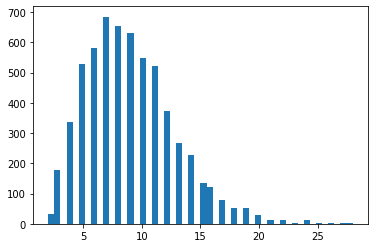

In [7]:
plt.hist(title_lens, bins = 50)
plt.show()

In [8]:
# checking max len of input data

# questions

questions = data['question_body'].copy()
questions = questions.str.split(' ')
questions_lens = []
for i in questions.values:
    questions_lens.append(len(i))
pd.Series(questions_lens).describe(percentiles=[0.05, 0.25,0.5,0.75,0.95,0.99])

count    6079.000000
mean      150.440204
std       228.709619
min         1.000000
5%         27.000000
25%        55.000000
50%        93.000000
75%       165.000000
95%       433.000000
99%      1026.720000
max      4666.000000
dtype: float64

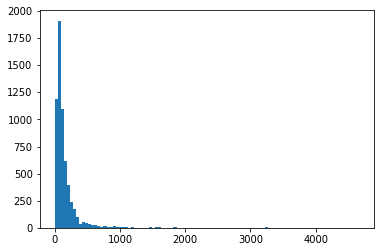

In [9]:
plt.hist(questions_lens, bins = 100)
plt.show()

In [10]:
# checking max len of input data

# answers

answers = data['answer'].copy()
answers = answers.str.split(' ')
answers_lens = []
for i in answers.values:
    answers_lens.append(len(i))
pd.Series(answers_lens).describe(percentiles=[0.05, 0.25,0.5,0.75,0.95, 0.99])

count    6079.000000
mean      143.708834
std       205.933584
min         2.000000
5%         18.000000
25%        48.000000
50%        91.000000
75%       170.000000
95%       428.200000
99%       882.440000
max      8158.000000
dtype: float64

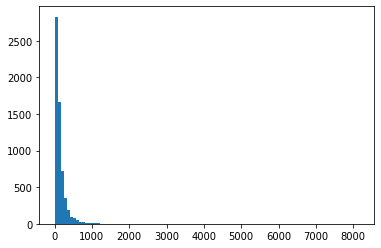

In [11]:
plt.hist(answers_lens, bins = 100)
plt.show()

In [12]:
# shortening questions and answers to 500 words
# this way, more than 95% remain intact, while saving a lot in terms of processing needs

# questions

questions = data['question_body'].copy()
questions = questions.str.split(' ')
questions_short = []
for i in questions.values:
    x = i[:500]
    questions_short.append(' '.join(x))
data['question_body'] = questions_short


# answers
answers = data['answer'].copy()
answers = answers.str.split(' ')
answers_short = []
for i in answers.values:
    x = i[:500]
    answers_short.append(' '.join(x))
data['answer'] = answers_short

In [15]:
# printing few random question-answer pairs

rdm = np.random.randint(0, len(data), 5)

for i in rdm:
    print('QUESTION TITLE: ', data.iloc[i]['question_title'])
    print('QUESTION: ', data.iloc[i]['question_body'])
    print('\n ANSWER: ', data.iloc[i]['answer'], '\n\n')

QUESTION TITLE:  Killed Enzymes in Yogurt
QUESTION:  We are big dairy eaters in our home, so I successfully make about a gallon of Greek yogurt every few weeks. Today I started my process as usual, but with so many things happening at once (just had my 2nd baby, so things are hectic), I failed to remember to let the milk cool before adding in my enzymes: I stirred them in right at 180 degrees. So having killed my enzymes (sigh), what can I do with all of this milk/yogurt mix aside from throwing it down the sink? Pardon my stupidity and lack of knowledge on the subject, but would the heating process alter at all the calories/nutrients in the milk/yogurt in any way (aside from the obvious death of the innocent enzymes)? Will my milk curdle or something? Thank you!


 ANSWER:  Why not just add more enzymes after the stuff cooled sufficiently?

Enzymes you add to food are generally not toxic. If you denature them by getting them too hot, they don't usually renature spontaneously when the f

In [16]:
# saving shortened data

data.to_csv('../datasets/train_shortened.csv')

# Ratings distributions

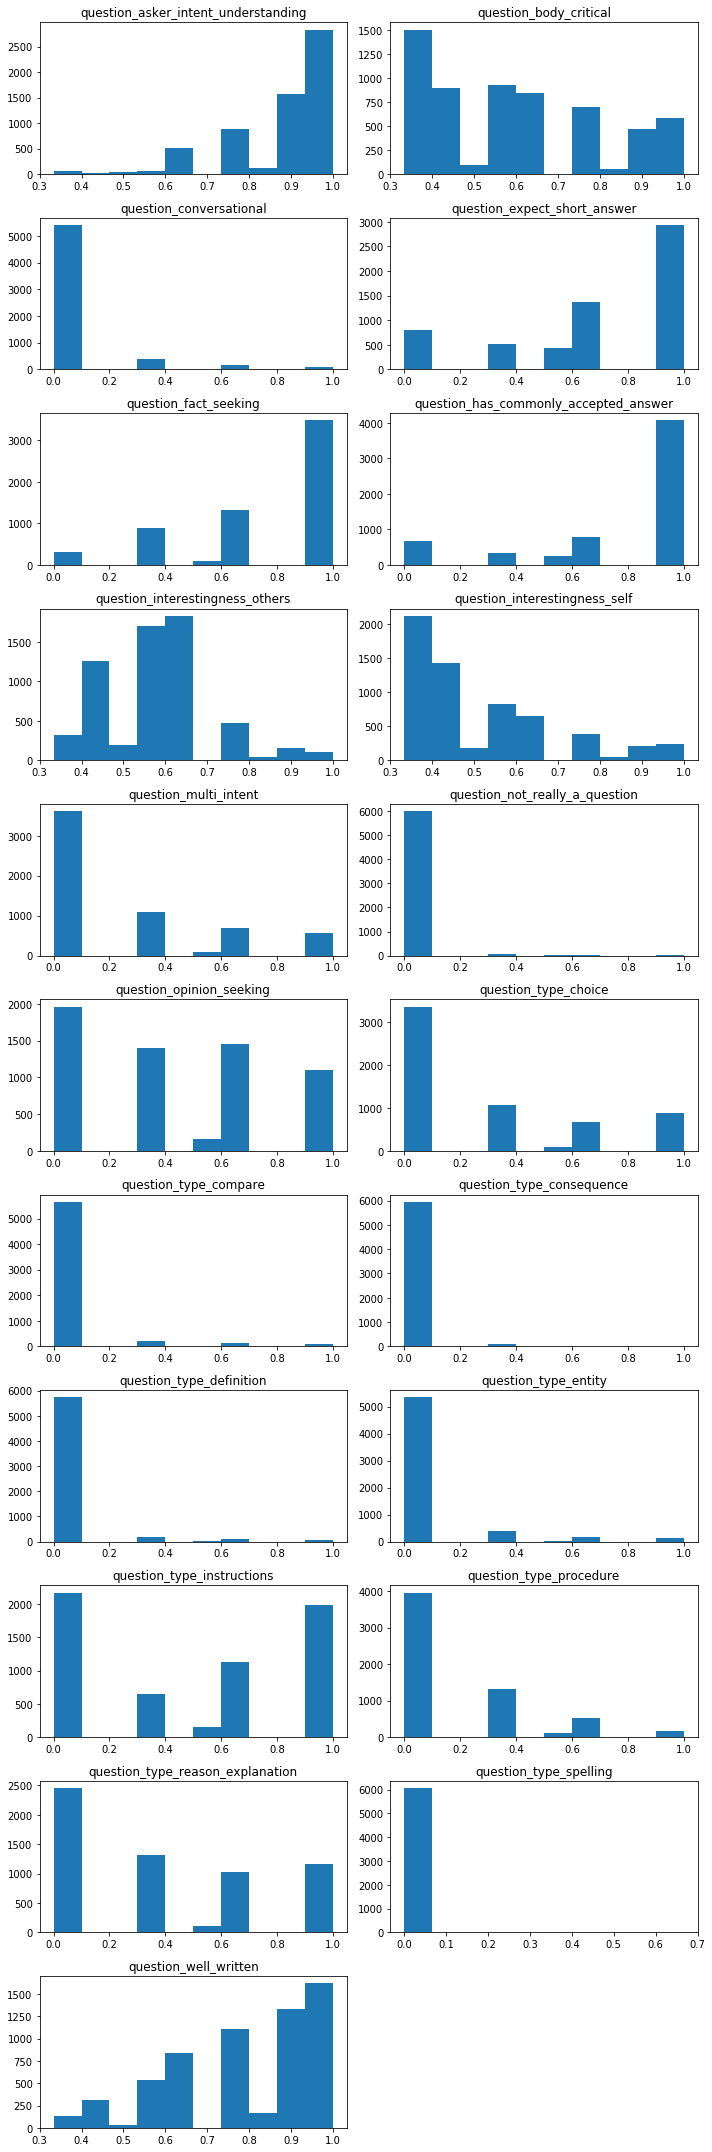

In [35]:
# questions

plt.figure(figsize=(10,30))

for i in range(len(data.columns[11:32])):
    plt.subplot(11,2,i+1)
    plt.hist(data[data.columns[11:32][i]].values, bins=10)
    plt.title(data.columns[11:32][i])
    plt.tight_layout()

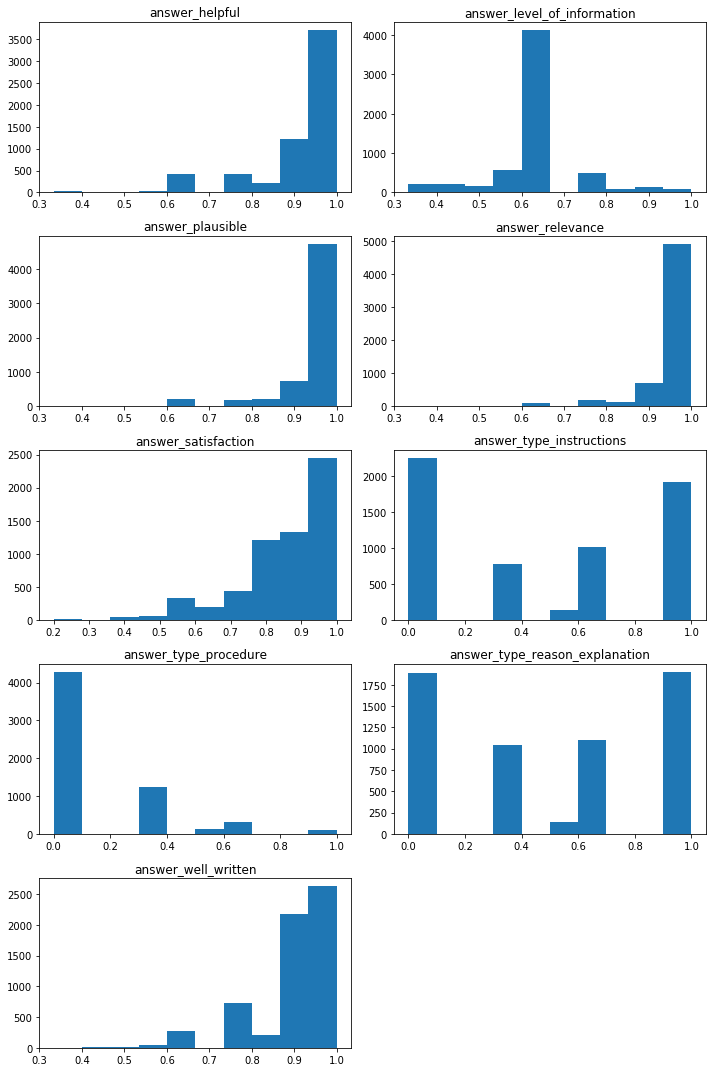

In [41]:
# answers

plt.figure(figsize=(10,15))

for i in range(len(data.columns[32:])):
    plt.subplot(5,2,i+1)
    plt.hist(data[data.columns[32:][i]].values, bins=10)
    plt.title(data.columns[32:][i])
    plt.tight_layout()